# Exercise 9 - Solutions

### 1: Product Sets

#### a) Cardinality of a Set

To calculate the cardinality, we can simply use the `len` function.

In [1]:
def card(A):
    """
    Function to compute the cardinality of a set.
    
    Paramerters
    -----------
        A : set
            The set for which the cardicnality is supposed to be computed
            
    Returns:
    -------
        The cardinaility of the set
    """
    return len(A)

Let's test the function.

In [2]:
A = {1,2,3}
card(A)

3

#### b) Cardinality of $A\times B$

Recall that $A\times B$ denotes the Cartesian product, i.e. the set of all ordered pairs. Thus, the cardinality of $A\times B$ is the cardinality of $A$ times the cardinality of $B$, i.e. $I\cdot J$.


#### c) Cardinality of $A_1\times A_2 \times ... \times A_k$
Following the same logic, we can write the cardinality of $A_1\times A_2 \times ... \times A_k$ as:

$$
card_{A_1,\dots,A_k} = \prod_{i=1}^k I_i
$$

#### d)  Number of parameters in an interaction model
We have one regression coefficient for each ordered pair of elements in $A$ and $B$. The number of regression coefficients is thus equal to the cardinality of $A\times B$, i.e. $I\cdot J$.

#### e) Number of parameters in a larger interaction model
Following the same logic as above, the number of regression coefficients is equal to the cardinality of the cartesian product of all sets, i.e. $\prod_{i=1}^k I_i$.

#### f) Your own product function
We can solve this exercise combining some of the tools we learned in previous classes. Two features come in particularly handy. First, in Python one can call a function within itself. Second, we can avoid storing temporary objects by using generators. Note that this solution is similar to on eof the answers in this [stackoverflow thread](https://stackoverflow.com/questions/533905/get-the-cartesian-product-of-a-series-of-lists).

In [3]:
def set_product(*args):
    """
    This function implements something like the `product` function of itertools.
    
    Parameters
    ----------
        args : tuple
            A tuple of input sets
    
    Returns
    -------
        A set of ordered pairs
    """
    
    # unpack the input arguments and convert to list
    elems = list([*args])
    
    # define an auxiliary function
    def compute_prod(elems):
        """
        This function is a nested function of `set_prodcuts`. This function computes 
        the cartesian product of a list of input sets.
        
        To give you a better idea, the function works roughly as follows:
        
        As an example, take elems = [[1,2,3], ['a','b','c'],[sum,list]].
        
        1) elems[0]  = [1,2,3], so i = 1. The 'i's will thus be 1, 2, and 3
        2) elems[1:] = [['a','b','c'],[sum,list]]. This set enters a new function call of the function itself.
            a) elem[0]  = ['a','b','c']. The 'i's will thus be 'a','b', and 'c'
            b) elems[1:] = [sum,list]. This set enters a new function call of the function itself.
                i) elem[0]   = [sum,list]
               ii) elems[1:] = is empty, so the function call will return (). We thus have the tuple (sum) and (list)
            c) prod now is and element of: (sum) and (list). We now add prod to every i of the outer loop. This
               results in ('a', sum), ('a', list), ('b', sum),...,('c', list)
        3) prod now is an element of ('a', sum), ('a', list), ('b', sum),...,('c', list). Each iteration of the  
           outer loop, we now add prod to each i. this results in:
          (1,'a', sum), (1,'a', list), (1, 'b', sum),..., (3, 'c', list)
            
        Parameters
        ----------
            elems : list
                A list of input sets
        """
        
        # once input is empty (e.g. when last element reached), break procedure and return empty tuple
        if not elems:
            yield()
            
        # if input is not empty continue
        else:
            # iterate over all elements in first input set
            for i in elems[0]:
                # iterate over all elements of the function output on the remaining sets
                for prod in compute_prod(elems[1:]):
                    
                    # add the output handle to the tuple
                    yield (i, )+prod

    # convert the output to a set
    return set(compute_prod(elems))

Let's now test the function:

In [4]:
# call the function
set_product([1,2,2,3], ["a", "b", "c"], [len, sum])

{(1, 'a', <function len(obj, /)>),
 (1, 'a', <function sum(iterable, /, start=0)>),
 (1, 'b', <function len(obj, /)>),
 (1, 'b', <function sum(iterable, /, start=0)>),
 (1, 'c', <function len(obj, /)>),
 (1, 'c', <function sum(iterable, /, start=0)>),
 (2, 'a', <function len(obj, /)>),
 (2, 'a', <function sum(iterable, /, start=0)>),
 (2, 'b', <function len(obj, /)>),
 (2, 'b', <function sum(iterable, /, start=0)>),
 (2, 'c', <function len(obj, /)>),
 (2, 'c', <function sum(iterable, /, start=0)>),
 (3, 'a', <function len(obj, /)>),
 (3, 'a', <function sum(iterable, /, start=0)>),
 (3, 'b', <function len(obj, /)>),
 (3, 'b', <function sum(iterable, /, start=0)>),
 (3, 'c', <function len(obj, /)>),
 (3, 'c', <function sum(iterable, /, start=0)>)}

### 2: Three-way interactions
#### a) Load the dataset

In [5]:
import pyreadr, os, pathlib

def pyreadr_load(url, local_file = "temp_pyreadr.rda"):
    """
    Download the R dataset at the specified url into local_file, load the 
    local file, delete the local file. Return the dataset.
    """
  
    file_name = pyreadr.download_file(url, local_file)
    dataframe = pyreadr.read_r(file_name)
    os.remove(str(pathlib.Path().resolve()) + "/" + file_name)
    name = next(iter(dataframe.items()))[0]
    return dataframe[name]

In [6]:
url = 'https://github.com/kassambara/datarium/blob/master/data/titanic.raw.rda?raw=true'
titanic = pyreadr_load(url)
titanic.head()

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


#### b) Age is not just a number
Plot taking class into account:

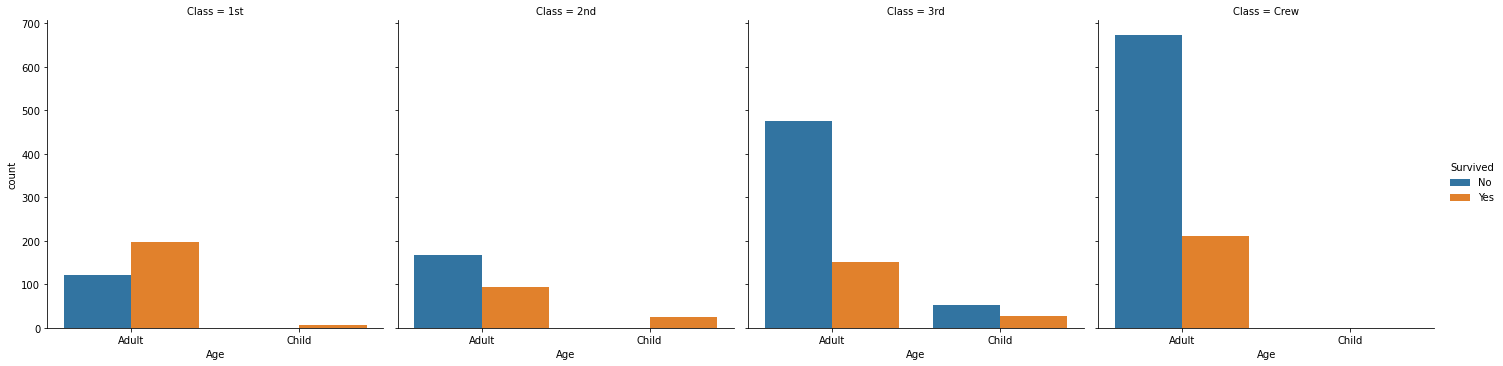

In [7]:
import seaborn as sns
sns.catplot(x="Age", hue="Survived", col="Class", data=titanic, kind="count")

Plot taking sex into account:

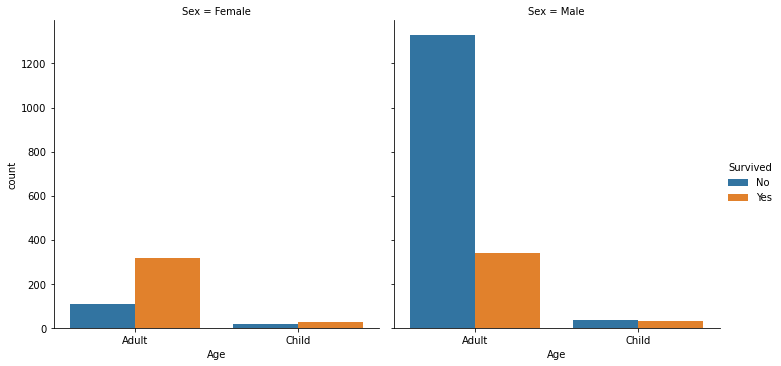

In [8]:
sns.catplot(x="Age", hue="Survived", col="Sex", data=titanic, kind="count")

#### c) Fitting a model

In [9]:
titanic_2 = titanic[titanic.Class != "Crew"]
titanic_2.Class = titanic_2.Class.astype(str).astype("category")

C:\BI-Apps\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
titanic_2.head()

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


#### d) Formulating a Model

##### (i)
$$
\begin{aligned}
y = \alpha &+ \beta_{male}1[Sex=male]  + \beta_{2nd\:class}1[Class=2nd]+ \beta_{3rd\:class}1[Class=3rd]
+ \beta_{child}1[Age=child] \\&+ \sum_{i=class \in [2nd,3rd]} \beta_{male,i}1[Sex=male]1[Class=i] + \beta_{male,child}I[Sex=male]1[Age=child] \\&+  \sum_{i=class \in [2nd,3rd]} \beta_{i,child}1[Class=i]1[Age=child] 
 \\&+  \sum_{i=class \in [2nd,3rd]} \beta_{male,i,child}1[Sex=male]1[Class=i]1[Age=child] 
\end{aligned}
$$

##### (ii)

$$
\begin{aligned}
y = \alpha +  \sum_{i=Sex \in [\emptyset,Male]}\sum_{j=class \in [\emptyset,2nd,3rd]} \sum_{k=Age \in [\emptyset,child]}\beta_{i,j,k}1[Sex=i]1[Class=j]1[Age=k] 
\end{aligned}
$$

In [11]:
import statsmodels.formula.api as smf
titanic_2.loc[:,"Survived_01"] = 1 * (titanic_2.Survived == "Yes")
fit = smf.ols("Survived_01 ~ Sex * Class * Age", data = titanic_2).fit()
fit.summary()

C:\BI-Apps\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\BI-Apps\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Survived_01   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     77.51
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          4.85e-134
Time:                        09:26:30   Log-Likelihood:                -584.51
No. Observations:                1316   AIC:                             1193.
Df Residuals:                    1304   BIC:                             1255.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.9722      0.032     30.782      0.000       0.910       1.034
Sex[T.Male]                              -0.6465      0.043    -15.161      0.000      -0.730      -0.563
Class[T.2nd]                             -0.1120      0.050     -2.222      0.026      -0.211      -0.013
Class[T.3rd]                             -0.5116      0.043    -11.837      0.000      -0.596      -0.427
Age[T.Child]                              0.0278      0.380      0.073      0.942      -0.718       0.774
Sex[T.Male]:Class[T.2nd]                 -0.1304      0.065     -2.007      0.045      -0.258      -0.003
Sex[T.Male]:Class[T.3rd]                  0.3482      0.055      6.358      0.000       0.241       0.456
Sex[T.Male]:Age[T.Child]                  0.6465      0.417      1.549      0.122      -0.172       1.465
Class[T.2nd]:Age[T.Child]                 0.1120      0.397      0.282      0.778      -0.666       0.890
Class[T.3rd]:Age[T.Child]                -0.0368      0.387     -0.095      0.924      -0.797       0.723
Sex[T.Male]:Class[T.2nd]:Age[T.Child]     0.1304      0.448      0.291      0.771      -0.749       1.009
Sex[T.Male]:Class[T.3rd]:Age[T.Child]    -0.5290      0.428     -1.237      0.216      -1.368       0.310
==============================================================================
Omnibus:                      136.409   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.916
Skew:                           0.893   Prob(JB):                     1.41e-39
Kurtosis:                       3.271   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### e) Running the model


In [12]:
import statsmodels.api as sm
sm.stats.anova_lm(fit, typ=2) 

,sum_sq,df,F,PR(>F)
Sex,65.846867,1.0,458.396505,2.173380e-87
Class,19.599973,2.0,68.223132,6.620721e-29
Age,3.655548,1.0,25.448293,5.185637e-07
Sex:Class,9.471245,2.0,32.967290,1.078205e-14
Sex:Age,1.966263,1.0,13.688248,2.247817e-04
Class:Age,4.502948,2.0,15.673758,1.877172e-07
Sex:Class:Age,1.874120,2.0,6.523392,1.517070e-03
Residual,187.314504,1304.0,NaN,NaN


In conclusion, we find that we can reject the null hypothesis $H_0$, that all of the interaction regression coefficients are $0$.